# Chapter 4 | Visualization of Numerical Experiments

Questions:

1) What is wrong with my simulation? They should all converge to the same out-of-sample performance as the portfolio will be the same in all cases?

Start by important libraries.

In [263]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

We start by creating a list of the files in the different results directories.

In [266]:
relativePathChapter4 = "./Results/Chapter4_TrackingCVaR"
filesChapter4 = os.listdir(relativePathChapter4)
relativePathChapter5 = "./Results/Chapter5_ExcessCVaR"
filesChapter5 = os.listdir(relativePathChapter5)

Then we can load them individually by creating a dictionary.

In [267]:
for idxFile, file in enumerate(filesChapter4):
    print("{}: ".format(idxFile+1), file, "\n")

1:  Chapter4_Experiment2_TrackingModel_J_recover_2_10_200.csv 

2:  Chapter4_Experiment1_TrackingModel_WassersteinWeights_T_63_126_189_252_378_504_P_0.8_0.3_S_200_recover_6_31_313.csv 

3:  Chapter4_Experiment1_TrackingModel_OoS_statistics_T_63_126_189_252_378_504_P_0.8_0.3_S_200_recover_6_200_31_16.csv 

4:  Chapter4_Experiment1_TrackingModel_IS_statistics_T_63_126_189_252_378_504_P_0.8_0.3_S_200_recover_6_200_31_16.csv 

5:  Chapter4_Experiment2_TrackingModel_Certificate_recover_2_10_200.csv 

6:  Chapter4_Experiment2_TrackingModel_epsOpt_recover_10_200.csv 

7:  Chapter4_ExperimentLog.txt 



Save file names for experiment 1.

In [268]:
Experiment1_TrackingModel_WassersteinWeights = filesChapter4[1]
Experiment1_TrackingModel_OoS_statistics = filesChapter4[2]
Experiment1_TrackingModel_IS_statistics = filesChapter4[3]

Save file names for experiment 2.

In [269]:
Experiment2_TrackingModel_J = filesChapter4[0]
Experiment2_TrackingModel_Certificate = filesChapter4[4]
Experiment2_TrackingModel_epsOpt = filesChapter4[5]

Then we can load the files and reshape them.

In [270]:
# Experiment 1
relativePath_EX1_TM_W = relativePathChapter4 + "/" + Experiment1_TrackingModel_WassersteinWeights
EX1_TM_W = np.loadtxt(relativePath_EX1_TM_W)
EX1_TM_W = EX1_TM_W.reshape((6,31,313))

relativePath_EX1_TM_OoS = relativePathChapter4 + "/" + Experiment1_TrackingModel_OoS_statistics
EX1_TM_OoS = np.loadtxt(relativePath_EX1_TM_OoS)
EX1_TM_OoS = EX1_TM_OoS.reshape((6,200,31,16))

relativePath_EX1_TM_IS = relativePathChapter4 + "/" + Experiment1_TrackingModel_IS_statistics
EX1_TM_IS = np.loadtxt(relativePath_EX1_TM_IS)
EX1_TM_IS = EX1_TM_IS.reshape((6,200,31,16))

# Experiment 2
relativePath_EX2_TM_J = relativePathChapter4 + "/" + Experiment2_TrackingModel_J
EX2_TM_J = np.loadtxt(relativePath_EX2_TM_J)
EX2_TM_J = EX2_TM_J.reshape((2,10,200))

relativePath_EX2_TM_C = relativePathChapter4 + "/" + Experiment2_TrackingModel_Certificate
EX2_TM_C = np.loadtxt(relativePath_EX2_TM_C)
EX2_TM_C = EX2_TM_C.reshape((2,10,200))

relativePath_EX2_TM_E = relativePathChapter4 + "/" + Experiment2_TrackingModel_epsOpt
EX2_TM_E = np.loadtxt(relativePath_EX2_TM_E)
EX2_TM_E = EX2_TM_E.reshape((10,200))

## Plots for Experiment 1

This part containts the plots in relation to experiment 1 for the tracking model.

## i. Change in Average Portfolio Weights

In the next, we specify the training sizes, epsilon collection, and simulations used.

In [248]:
nSim = 200
trainingSizes = [63, 126, 189, 252, 378, 504]
epsCollection = epsCollection = 10**np.linspace(-3, 1, 30)
nEps = len(epsCollection)
beta = 0.80
rho = 0.30

Then we randomly select 10 assets to make visualization more appealing.

In [109]:
np.random.seed(42)

subset_selector = np.random.randint(0, high=EX1_TM_W.shape[2]-1, size=10)
assetNames = np.array(subset_selector, dtype=str)
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

Then we can plot the figure.

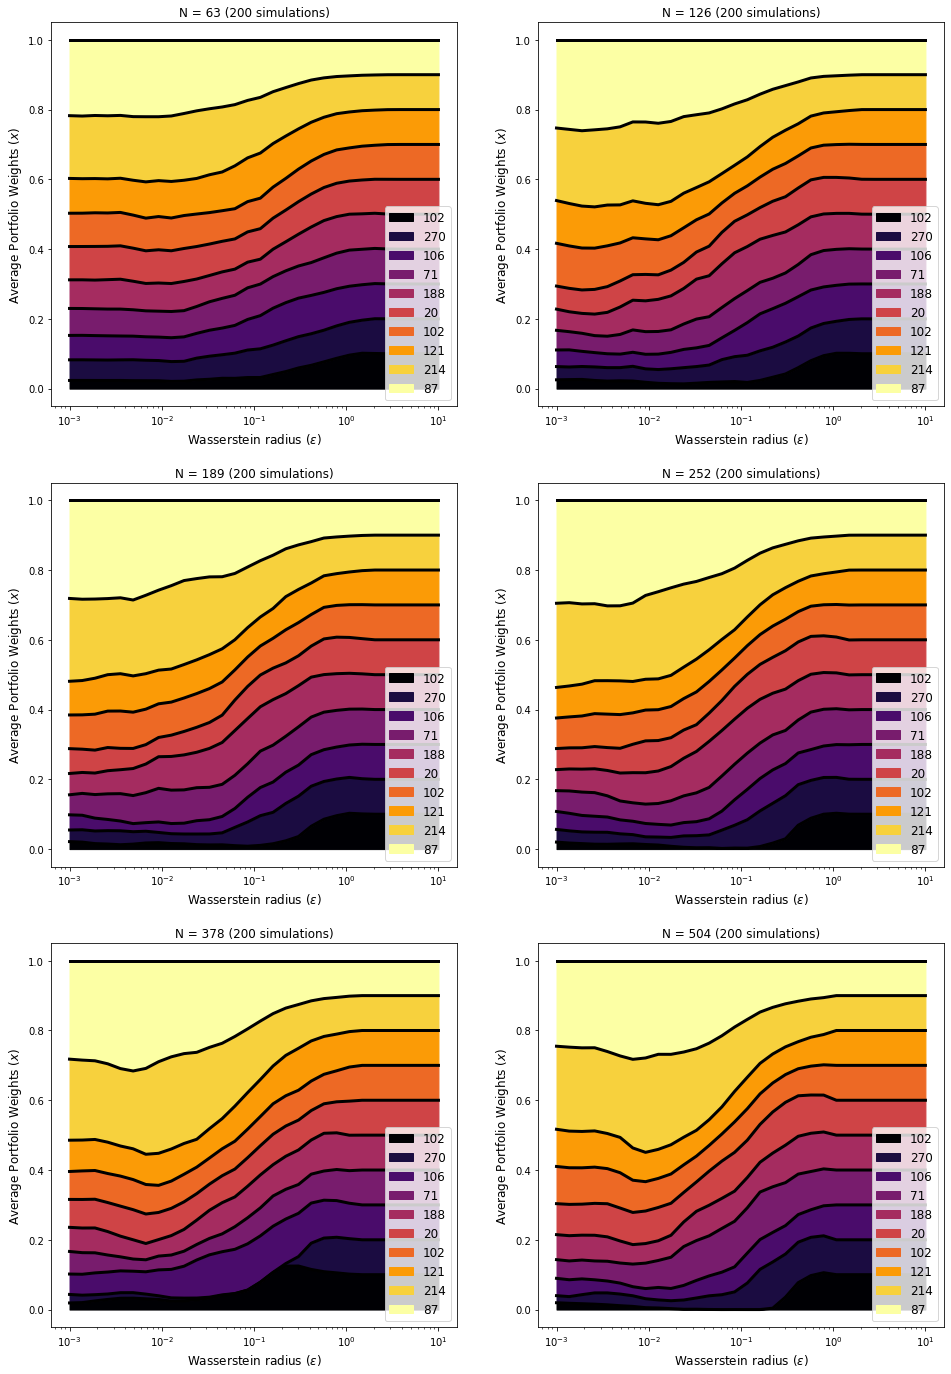

In [110]:
# Plot the weights
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 24))

for j in range(2):
    
    # Compute average weights (and select random subset)
    trainingSize = trainingSizes[j]
    Avg_w = EX1_TM_W[j,1:,:]/nSim
    sort_indices = np.argsort(Avg_w[0,subset_selector])
    subset_selector = subset_selector[sort_indices]
    Avg_w_subset = Avg_w[:,subset_selector]

    # Normalize weights to sum to 1
    for i in range(Avg_w_subset.shape[0]):
        Avg_w_subset[i,:] = Avg_w_subset[i,:]/sum(Avg_w_subset[i,:])

    # Average weights
    wCumSum = np.cumsum(Avg_w_subset, axis=1)    

    # Plot the result
    ax[0,j].plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax[0,j].fill_between(epsCollection, wCumSum[:,0], color=colors[0,:], label=assetNames[0])
    for i in range(1,len(subset_selector)):
        ax[0,j].fill_between(epsCollection, wCumSum[:,i-1], wCumSum[:,i], color=colors[i,:], label=assetNames[i])
    ax[0,j].set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=12)
    ax[0,j].set_ylabel(r'Average Portfolio Weights ($x$)', fontsize=12)
    ax[0,j].legend(loc="lower right", facecolor="white", fontsize=12)
    ax[0,j].set_xscale('log')
    ax[0,j].set_title(r'N = {} ({} simulations)'.format(trainingSizes[j], nSim))
    
for j in range(2):
    
    # Compute average weights (and select random subset)
    trainingSize = trainingSizes[j+2]
    Avg_w = EX1_TM_W[j+2,1:,:]/nSim
    sort_indices = np.argsort(Avg_w[0,subset_selector])
    subset_selector = subset_selector[sort_indices]
    Avg_w_subset = Avg_w[:,subset_selector]

    # Normalize weights to sum to 1
    for i in range(Avg_w_subset.shape[0]):
        Avg_w_subset[i,:] = Avg_w_subset[i,:]/sum(Avg_w_subset[i,:])

    # Average weights
    wCumSum = np.cumsum(Avg_w_subset, axis=1)    

    # Plot the result
    ax[1,j].plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax[1,j].fill_between(epsCollection, wCumSum[:,0], color=colors[0,:], label=assetNames[0])
    for i in range(1,len(subset_selector)):
        ax[1,j].fill_between(epsCollection, wCumSum[:,i-1], wCumSum[:,i], color=colors[i,:], label=assetNames[i])
    ax[1,j].set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=12)
    ax[1,j].set_ylabel(r'Average Portfolio Weights ($x$)', fontsize=12)
    ax[1,j].legend(loc="lower right", facecolor="white", fontsize=12)
    ax[1,j].set_xscale('log')
    ax[1,j].set_title(r'N = {} ({} simulations)'.format(trainingSizes[j+2], nSim))
    
for j in range(2):
    
    # Define shift
    shift = 4
    
    # Compute average weights (and select random subset)
    trainingSize = trainingSizes[j+shift]
    Avg_w = EX1_TM_W[j+shift,1:,:]/nSim
    sort_indices = np.argsort(Avg_w[0,subset_selector])
    subset_selector = subset_selector[sort_indices]
    Avg_w_subset = Avg_w[:,subset_selector]

    # Normalize weights to sum to 1
    for i in range(Avg_w_subset.shape[0]):
        Avg_w_subset[i,:] = Avg_w_subset[i,:]/sum(Avg_w_subset[i,:])

    # Average weights
    wCumSum = np.cumsum(Avg_w_subset, axis=1)    

    # Plot the result
    ax[2,j].plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax[2,j].fill_between(epsCollection, wCumSum[:,0], color=colors[0,:], label=assetNames[0])
    for i in range(1,len(subset_selector)):
        ax[2,j].fill_between(epsCollection, wCumSum[:,i-1], wCumSum[:,i], color=colors[i,:], label=assetNames[i])
    ax[2,j].set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=12)
    ax[2,j].set_ylabel(r'Average Portfolio Weights ($x$)', fontsize=12)
    ax[2,j].legend(loc="lower right", facecolor="white", fontsize=12)
    ax[2,j].set_xscale('log')
    ax[2,j].set_title(r'N = {} ({} simulations)'.format(trainingSizes[j+shift], nSim))

# Save figure
relativePathChapter4Plots = "./ResultsPlots/Chapter4_TrackingCVaR/"
fileName = 'TRACKING_Fig1_WassersteinWeights_Normalized_{}_{}_P_{}_{}.png'.format(nSim, nEps, rho, beta)
relativeFilePath = relativePathChapter4Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show figure
plt.show()

Then we make a plot where they are not normalized. All the non-selected assets must then be put into a bucket.

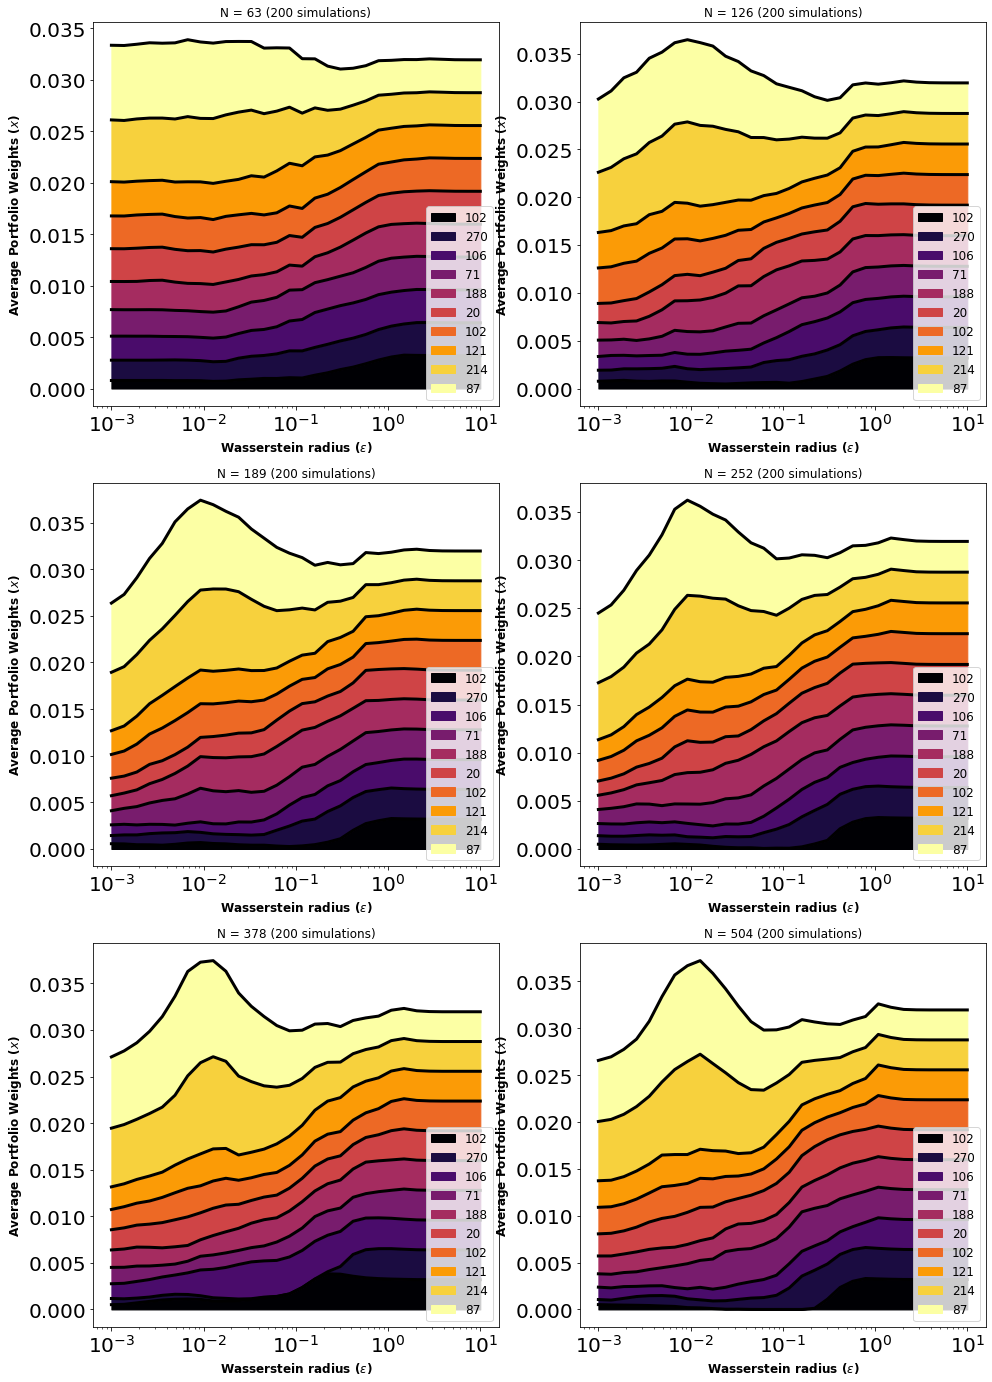

In [260]:
# Plot the weights
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 24))

for j in range(2):
    
    # Compute average weights (and select random subset)
    trainingSize = trainingSizes[j]
    Avg_w = EX1_TM_W[j,1:,:]/nSim
    sort_indices = np.argsort(Avg_w[0,subset_selector])
    subset_selector = subset_selector[sort_indices]
    Avg_w_subset = Avg_w[:,subset_selector]

    # Average weights
    wCumSum = np.cumsum(Avg_w_subset, axis=1)    

    # Plot the result
    ax[0,j].plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax[0,j].fill_between(epsCollection, wCumSum[:,0], color=colors[0,:], label=assetNames[0])
    for i in range(1,len(subset_selector)):
        ax[0,j].fill_between(epsCollection, wCumSum[:,i-1], wCumSum[:,i], color=colors[i,:], label=assetNames[i])
    ax[0,j].set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=12, fontweight='bold')
    ax[0,j].set_ylabel(r'Average Portfolio Weights ($x$)', fontsize=12, fontweight='bold')
    ax[0,j].legend(loc="lower right", facecolor="white", fontsize=12)
    ax[0,j].set_xscale('log')
    ax[0,j].set_title(r'N = {} ({} simulations)'.format(trainingSizes[j], nSim))
    
for j in range(2):
    
    # Compute average weights (and select random subset)
    trainingSize = trainingSizes[j+2]
    Avg_w = EX1_TM_W[j+2,1:,:]/nSim
    sort_indices = np.argsort(Avg_w[0,subset_selector])
    subset_selector = subset_selector[sort_indices]
    Avg_w_subset = Avg_w[:,subset_selector]

    # Average weights
    wCumSum = np.cumsum(Avg_w_subset, axis=1)    

    # Plot the result
    ax[1,j].plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax[1,j].fill_between(epsCollection, wCumSum[:,0], color=colors[0,:], label=assetNames[0])
    for i in range(1,len(subset_selector)):
        ax[1,j].fill_between(epsCollection, wCumSum[:,i-1], wCumSum[:,i], color=colors[i,:], label=assetNames[i])
    ax[1,j].set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=12, fontweight='bold')
    ax[1,j].set_ylabel(r'Average Portfolio Weights ($x$)', fontsize=12, fontweight='bold')
    ax[1,j].legend(loc="lower right", facecolor="white", fontsize=12)
    ax[1,j].set_xscale('log')
    ax[1,j].set_title(r'N = {} ({} simulations)'.format(trainingSizes[j+2], nSim))
    
for j in range(2):
    
    # Define shift
    shift = 4
    
    # Compute average weights (and select random subset)
    trainingSize = trainingSizes[j+shift]
    Avg_w = EX1_TM_W[j+shift,1:,:]/nSim
    sort_indices = np.argsort(Avg_w[0,subset_selector])
    subset_selector = subset_selector[sort_indices]
    Avg_w_subset = Avg_w[:,subset_selector]

    # Average weights
    wCumSum = np.cumsum(Avg_w_subset, axis=1)    

    # Plot the result
    ax[2,j].plot(epsCollection, wCumSum, color='black', linewidth=3)
    ax[2,j].fill_between(epsCollection, wCumSum[:,0], color=colors[0,:], label=assetNames[0])
    for i in range(1,len(subset_selector)):
        ax[2,j].fill_between(epsCollection, wCumSum[:,i-1], wCumSum[:,i], color=colors[i,:], label=assetNames[i])
    ax[2,j].set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=12, fontweight='bold')
    ax[2,j].set_ylabel(r'Average Portfolio Weights ($x$)', fontsize=12, fontweight='bold')
    ax[2,j].legend(loc="lower right", facecolor="white", fontsize=12)
    ax[2,j].set_xscale('log')
    ax[2,j].set_title(r'N = {} ({} simulations)'.format(trainingSizes[j+shift], nSim))

# Save figure
relativePathChapter4Plots = "./ResultsPlots/Chapter4_TrackingCVaR/"
fileName = 'TRACKING_Fig1_WassersteinWeights_{}_{}_P_{}_{}.png'.format(nSim, nEps, rho, beta)
relativeFilePath = relativePathChapter4Plots + fileName
#plt.savefig(relativeFilePath, dpi=200)

# Show figure
plt.show()

## ii. Dispersion in Average Portfolio Weights

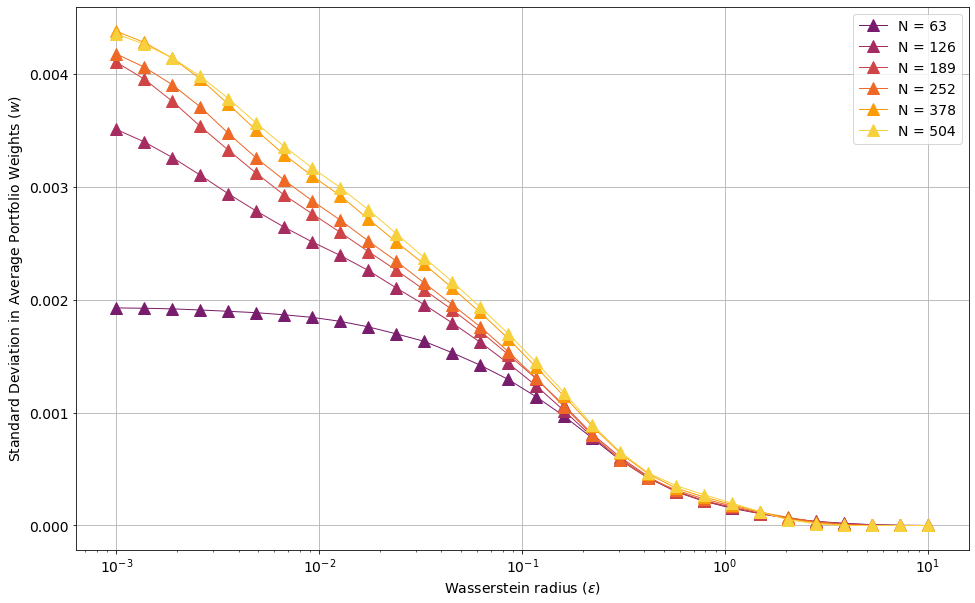

In [123]:
# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))

# Now construct the plot
for j in range(EX1_TM_W.shape[0]):
    Avg_w = EX1_TM_W[j,1:,:]/nSim
    ax.plot(epsCollection, np.std(Avg_w, axis=1), marker="^", label="N = {}".format(trainingSizes[j]), markersize=12, color=colors[3+j,:], linewidth=1)
    
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=14)
ax.set_ylabel(r'Standard Deviation in Average Portfolio Weights ($w$)', fontsize=14)
ax.set_xscale('log')
ax.tick_params('both', labelsize=14)
ax.legend(fontsize=14)
ax.grid()

# Save figure
relativePathChapter4Plots = "./ResultsPlots/Chapter4_TrackingCVaR/"
fileName = 'TRACKING_Fig2_WassersteinWeightsDeviation_{}_{}_P_{}_{}.png'.format(nSim, nEps, rho, beta)
relativeFilePath = relativePathChapter4Plots + fileName
plt.savefig(relativeFilePath, dpi=200)

# Show figure
plt.show()

## iii. Out-of-Sample Performance and Reliability

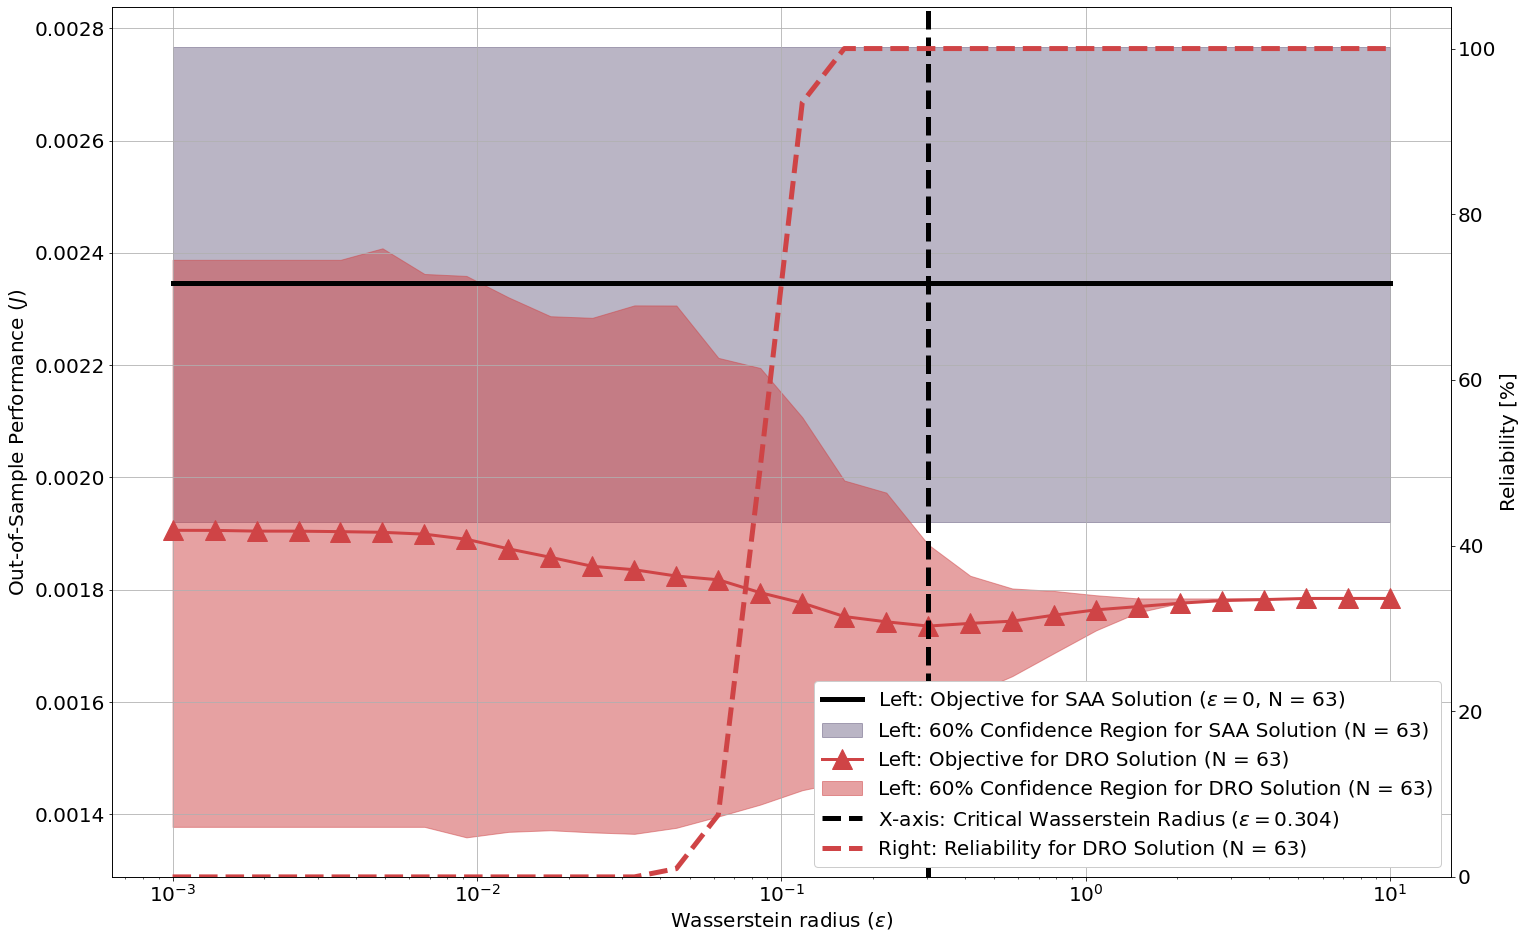

In [185]:
# Choose training size
TS = 0

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# --------- First plot ---------

colorChoice = 5
colorChoiceRel = 5

# Plot SAA
meanJ_SAA = np.repeat(np.mean(EX1_TM_OoS[TS,:,0,0]), len(epsCollection))
P80J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.80), len(epsCollection))
P20J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.20), len(epsCollection))
ax.plot(epsCollection, meanJ_SAA, linewidth=5, color='black', label=r"Left: Objective for SAA Solution ($\epsilon = 0$, N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[1,:], alpha=0.3, label="Left: 60% Confidence Region for SAA Solution (N = {})".format(trainingSizes[TS]))

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_TM_OoS[TS,:,1:,0].T, axis=1)
P80J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.20, axis=1)
ax.plot(epsCollection, meanJ, 
            marker="^", markersize=20, color=colors[colorChoice,:], linewidth=3, label="Left: Objective for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J, P80J, color=colors[colorChoice,:], alpha=0.5, label="Left: 60% Confidence Region for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize)

ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize)
ax.set_xscale('log')
ax.grid()

# Construct the reliability plot
axTwinx = ax.twinx()
relMatrix = EX1_TM_OoS[TS,:,1:,0] < EX1_TM_IS[TS,:,1:,0]
totalSim = EX1_TM_OoS[TS,:,1:,0].shape[0]
reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
axTwinx.plot(epsCollection, reliabibility, color=colors[colorChoiceRel,:], linewidth=5, linestyle="--", label="Right: Reliability for DRO Solution (N = {})".format(trainingSizes[TS]))
axTwinx.set_yticks(np.arange(0, 120, 20))
axTwinx.set_ylim(0, 105)
axTwinx.set_ylabel(r'Reliability [%]', fontsize=fontSize)

# Plot critical Wasserstein Radius
ax.axvline(x = epsCollection[np.argmin(meanJ)], color = 'black', linewidth=5, linestyle="--", label = r'X-axis: Critical Wasserstein Radius ($\epsilon = {}$)'.format(round(epsCollection[np.argmin(meanJ)],3)))

# Construct legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axTwinx.get_legend_handles_labels()
axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='lower right')


# Show plot
plt.show()

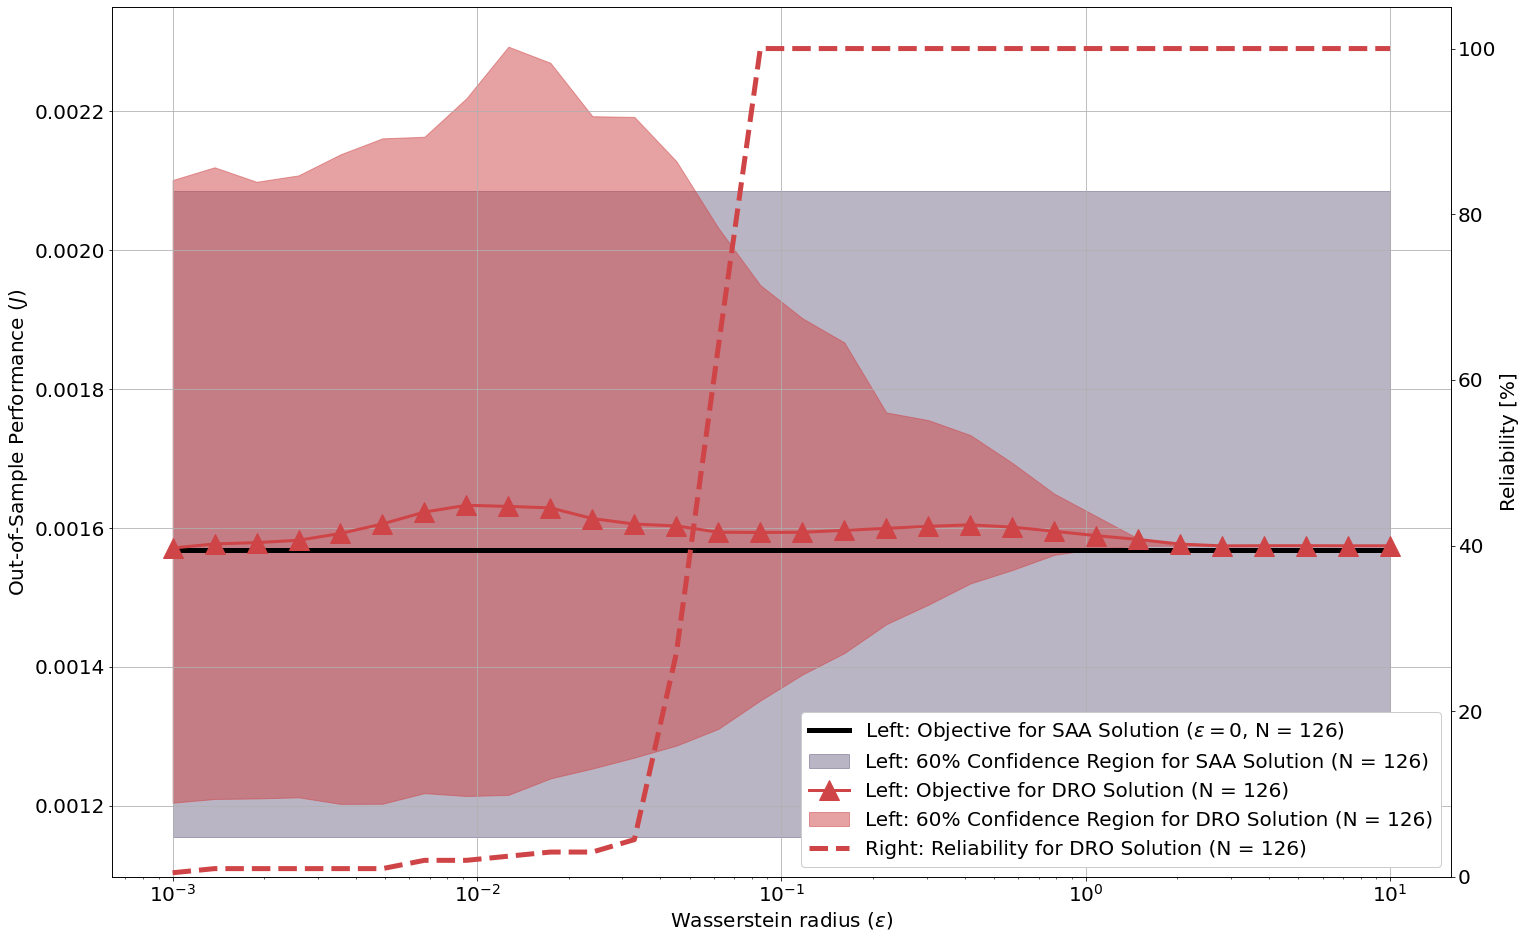

In [188]:
# Choose training size
TS = 1

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# --------- First plot ---------

colorChoice = 5
colorChoiceRel = 5

# Plot SAA
meanJ_SAA = np.repeat(np.mean(EX1_TM_OoS[TS,:,0,0]), len(epsCollection))
P80J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.80), len(epsCollection))
P20J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.20), len(epsCollection))
ax.plot(epsCollection, meanJ_SAA, linewidth=5, color='black', label=r"Left: Objective for SAA Solution ($\epsilon = 0$, N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[1,:], alpha=0.3, label="Left: 60% Confidence Region for SAA Solution (N = {})".format(trainingSizes[TS]))

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_TM_OoS[TS,:,1:,0].T, axis=1)
P80J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.20, axis=1)
ax.plot(epsCollection, meanJ, 
            marker="^", markersize=20, color=colors[colorChoice,:], linewidth=3, label="Left: Objective for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J, P80J, color=colors[colorChoice,:], alpha=0.5, label="Left: 60% Confidence Region for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize)

ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize)
ax.set_xscale('log')
ax.grid()

# Construct the reliability plot
axTwinx = ax.twinx()
relMatrix = EX1_TM_OoS[TS,:,1:,0] < EX1_TM_IS[TS,:,1:,0]
totalSim = EX1_TM_OoS[TS,:,1:,0].shape[0]
reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
axTwinx.plot(epsCollection, reliabibility, color=colors[colorChoiceRel,:], linewidth=5, linestyle="--", label="Right: Reliability for DRO Solution (N = {})".format(trainingSizes[TS]))
axTwinx.set_yticks(np.arange(0, 120, 20))
axTwinx.set_ylim(0, 105)
axTwinx.set_ylabel(r'Reliability [%]', fontsize=fontSize)

# Construct legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axTwinx.get_legend_handles_labels()
axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='lower right')


# Show plot
plt.show()

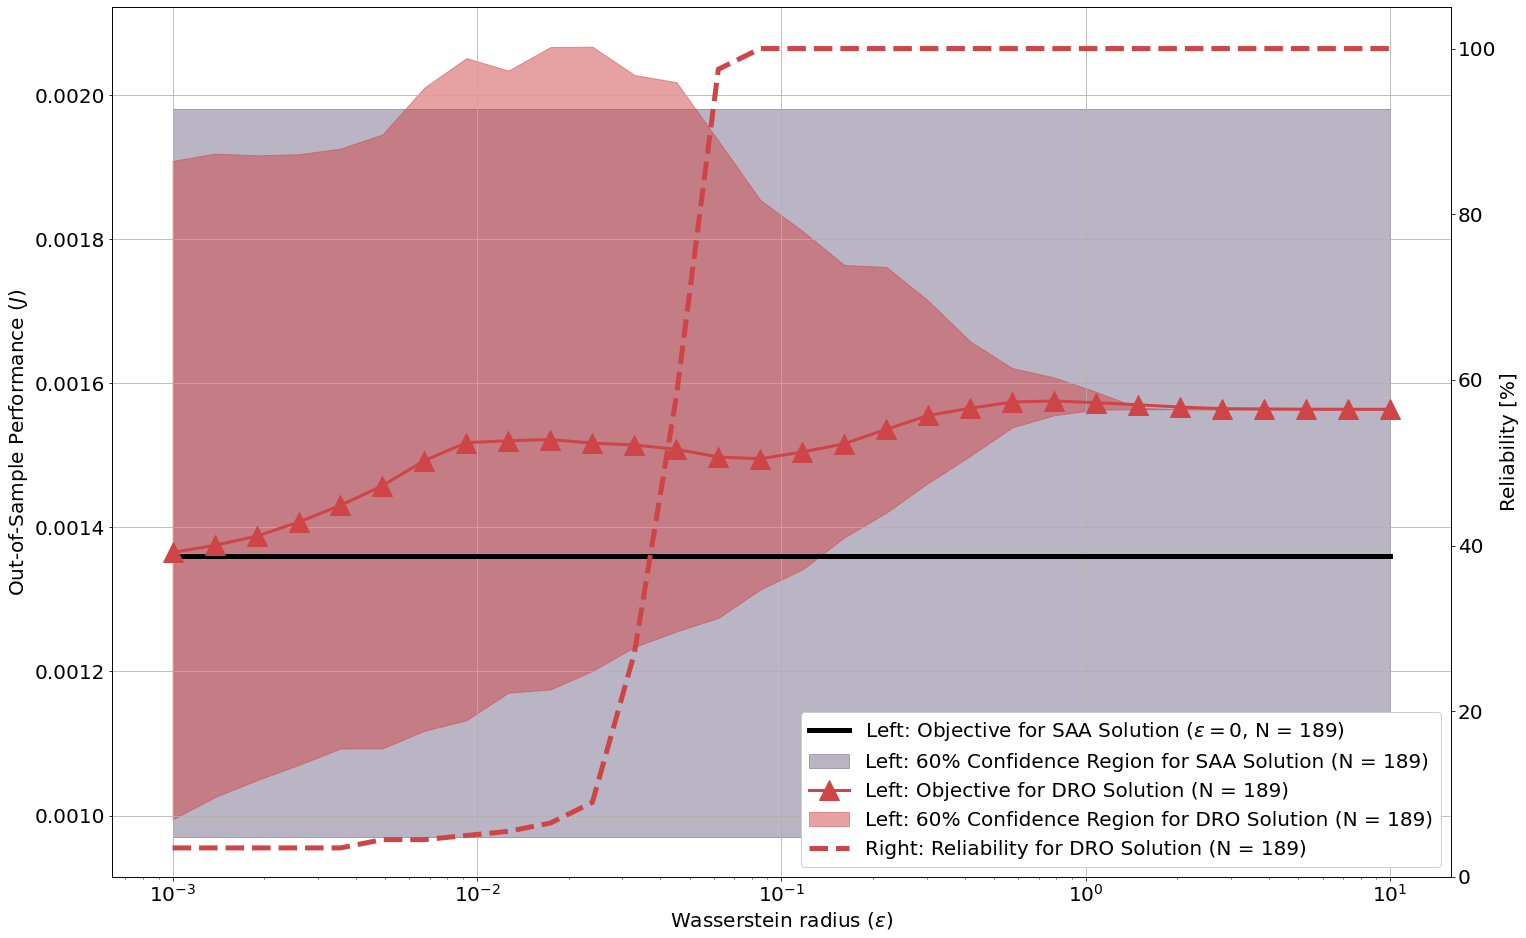

In [189]:
# Choose training size
TS = 2

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# --------- First plot ---------

colorChoice = 5
colorChoiceRel = 5

# Plot SAA
meanJ_SAA = np.repeat(np.mean(EX1_TM_OoS[TS,:,0,0]), len(epsCollection))
P80J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.80), len(epsCollection))
P20J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.20), len(epsCollection))
ax.plot(epsCollection, meanJ_SAA, linewidth=5, color='black', label=r"Left: Objective for SAA Solution ($\epsilon = 0$, N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[1,:], alpha=0.3, label="Left: 60% Confidence Region for SAA Solution (N = {})".format(trainingSizes[TS]))

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_TM_OoS[TS,:,1:,0].T, axis=1)
P80J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.20, axis=1)
ax.plot(epsCollection, meanJ, 
            marker="^", markersize=20, color=colors[colorChoice,:], linewidth=3, label="Left: Objective for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J, P80J, color=colors[colorChoice,:], alpha=0.5, label="Left: 60% Confidence Region for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize)

ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize)
ax.set_xscale('log')
ax.grid()

# Construct the reliability plot
axTwinx = ax.twinx()
relMatrix = EX1_TM_OoS[TS,:,1:,0] < EX1_TM_IS[TS,:,1:,0]
totalSim = EX1_TM_OoS[TS,:,1:,0].shape[0]
reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
axTwinx.plot(epsCollection, reliabibility, color=colors[colorChoiceRel,:], linewidth=5, linestyle="--", label="Right: Reliability for DRO Solution (N = {})".format(trainingSizes[TS]))
axTwinx.set_yticks(np.arange(0, 120, 20))
axTwinx.set_ylim(0, 105)
axTwinx.set_ylabel(r'Reliability [%]', fontsize=fontSize)

# Construct legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axTwinx.get_legend_handles_labels()
axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='lower right')


# Show plot
plt.show()

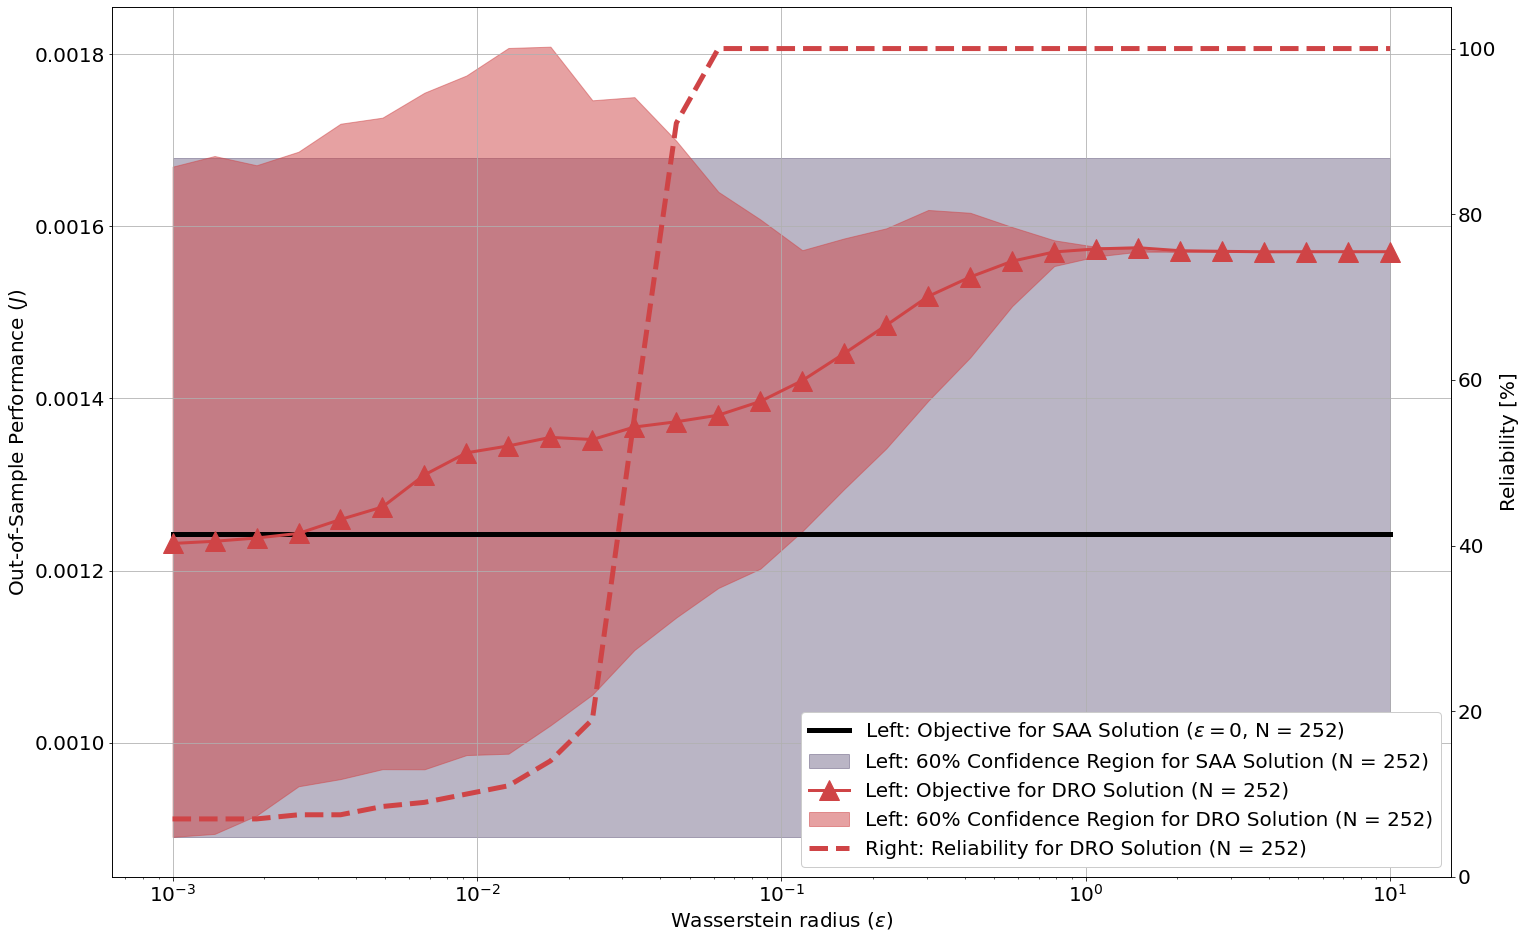

In [190]:
# Choose training size
TS = 3

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# --------- First plot ---------

colorChoice = 5
colorChoiceRel = 5

# Plot SAA
meanJ_SAA = np.repeat(np.mean(EX1_TM_OoS[TS,:,0,0]), len(epsCollection))
P80J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.80), len(epsCollection))
P20J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.20), len(epsCollection))
ax.plot(epsCollection, meanJ_SAA, linewidth=5, color='black', label=r"Left: Objective for SAA Solution ($\epsilon = 0$, N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[1,:], alpha=0.3, label="Left: 60% Confidence Region for SAA Solution (N = {})".format(trainingSizes[TS]))

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_TM_OoS[TS,:,1:,0].T, axis=1)
P80J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.20, axis=1)
ax.plot(epsCollection, meanJ, 
            marker="^", markersize=20, color=colors[colorChoice,:], linewidth=3, label="Left: Objective for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J, P80J, color=colors[colorChoice,:], alpha=0.5, label="Left: 60% Confidence Region for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize)

ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize)
ax.set_xscale('log')
ax.grid()

# Construct the reliability plot
axTwinx = ax.twinx()
relMatrix = EX1_TM_OoS[TS,:,1:,0] < EX1_TM_IS[TS,:,1:,0]
totalSim = EX1_TM_OoS[TS,:,1:,0].shape[0]
reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
axTwinx.plot(epsCollection, reliabibility, color=colors[colorChoiceRel,:], linewidth=5, linestyle="--", label="Right: Reliability for DRO Solution (N = {})".format(trainingSizes[TS]))
axTwinx.set_yticks(np.arange(0, 120, 20))
axTwinx.set_ylim(0, 105)
axTwinx.set_ylabel(r'Reliability [%]', fontsize=fontSize)

# Construct legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axTwinx.get_legend_handles_labels()
axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='lower right')


# Show plot
plt.show()

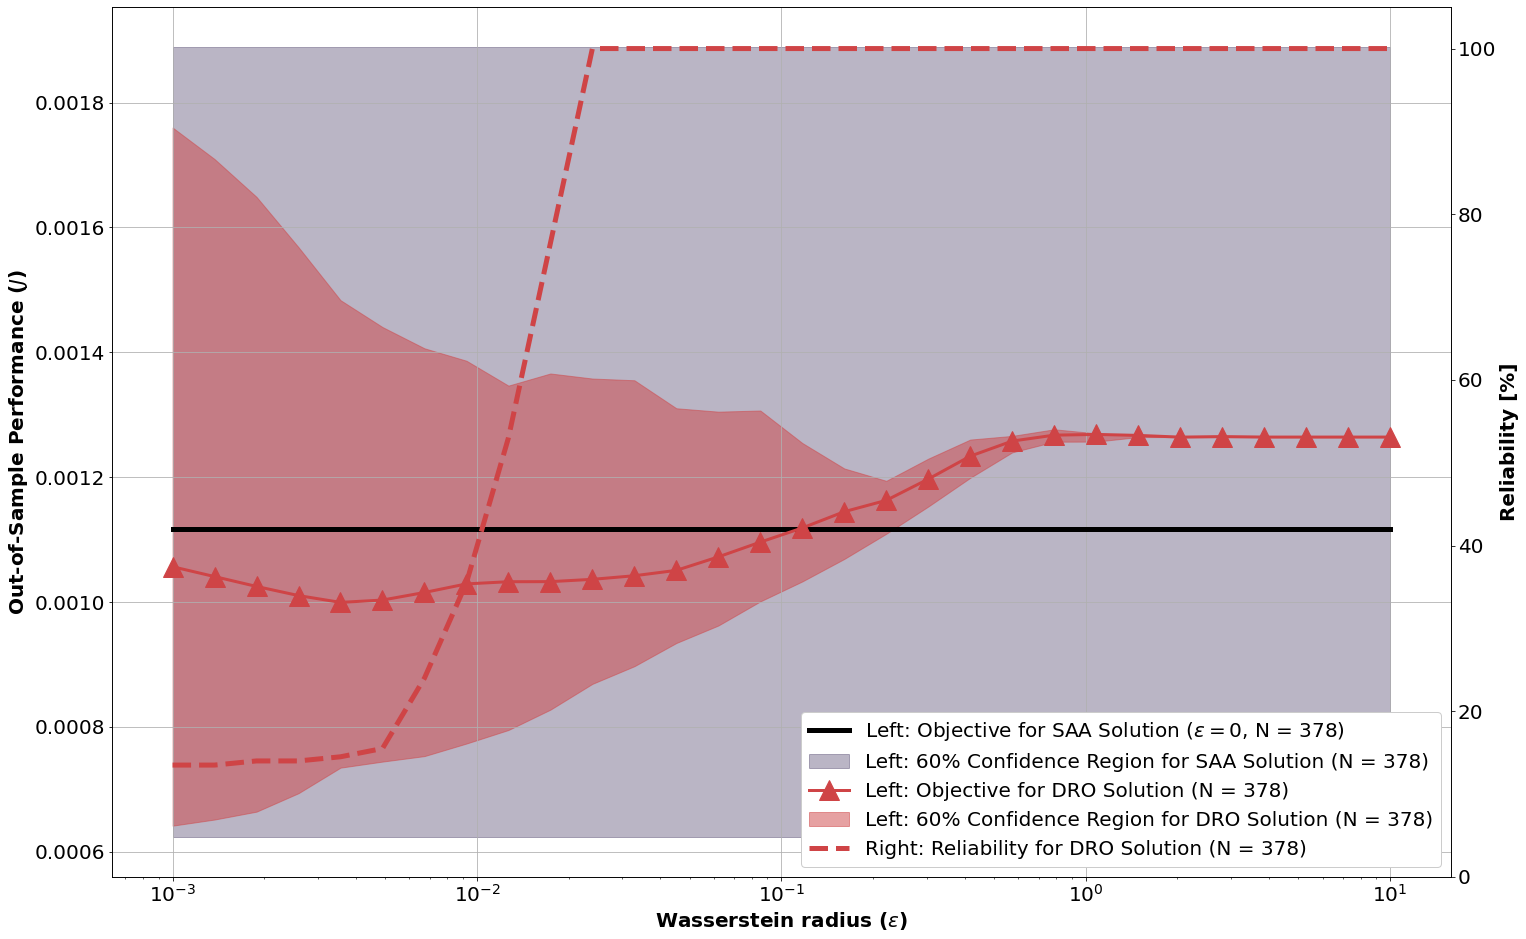

In [253]:
# Choose training size
TS = 4

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# --------- First plot ---------

colorChoice = 5
colorChoiceRel = 5

# Plot SAA
meanJ_SAA = np.repeat(np.mean(EX1_TM_OoS[TS,:,0,0]), len(epsCollection))
P80J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.80), len(epsCollection))
P20J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.20), len(epsCollection))
ax.plot(epsCollection, meanJ_SAA, linewidth=5, color='black', label=r"Left: Objective for SAA Solution ($\epsilon = 0$, N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[1,:], alpha=0.3, label="Left: 60% Confidence Region for SAA Solution (N = {})".format(trainingSizes[TS]))

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_TM_OoS[TS,:,1:,0].T, axis=1)
P80J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.20, axis=1)
ax.plot(epsCollection, meanJ, 
            marker="^", markersize=20, color=colors[colorChoice,:], linewidth=3, label="Left: Objective for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J, P80J, color=colors[colorChoice,:], alpha=0.5, label="Left: 60% Confidence Region for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize, fontweight='bold')
ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize, fontweight='bold')
ax.set_xscale('log')
ax.grid()

# Construct the reliability plot
axTwinx = ax.twinx()
relMatrix = EX1_TM_OoS[TS,:,1:,0] < EX1_TM_IS[TS,:,1:,0]
totalSim = EX1_TM_OoS[TS,:,1:,0].shape[0]
reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
axTwinx.plot(epsCollection, reliabibility, color=colors[colorChoiceRel,:], linewidth=5, linestyle="--", label="Right: Reliability for DRO Solution (N = {})".format(trainingSizes[TS]))
axTwinx.set_yticks(np.arange(0, 120, 20))
axTwinx.set_ylim(0, 105)
axTwinx.set_ylabel(r'Reliability [%]', fontsize=fontSize, fontweight='bold')

# Construct legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axTwinx.get_legend_handles_labels()
axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='lower right')


# Show plot
plt.show()

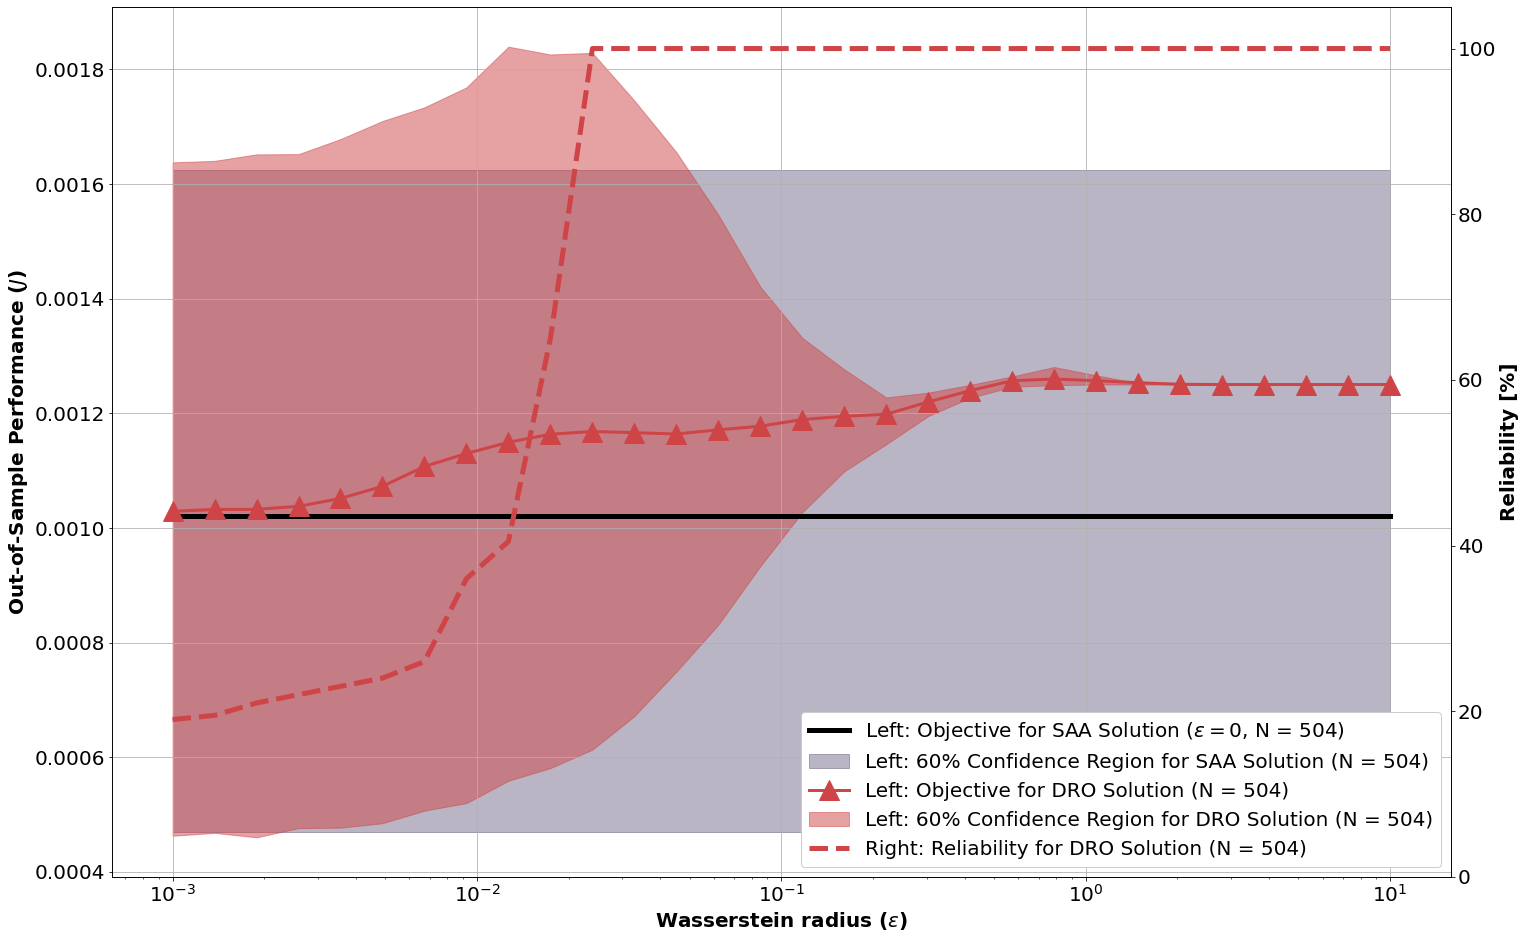

In [252]:
# Choose training size
TS = 5

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# --------- First plot ---------

colorChoice = 5
colorChoiceRel = 5

# Plot SAA
meanJ_SAA = np.repeat(np.mean(EX1_TM_OoS[TS,:,0,0]), len(epsCollection))
P80J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.80), len(epsCollection))
P20J_SAA = np.repeat(np.quantile(EX1_TM_OoS[TS,:,0,0], 0.20), len(epsCollection))
ax.plot(epsCollection, meanJ_SAA, linewidth=5, color='black', label=r"Left: Objective for SAA Solution ($\epsilon = 0$, N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J_SAA, P80J_SAA, color=colors[1,:], alpha=0.3, label="Left: 60% Confidence Region for SAA Solution (N = {})".format(trainingSizes[TS]))

# Plot OoS as function of Wasserstein Radius
meanJ = np.mean(EX1_TM_OoS[TS,:,1:,0].T, axis=1)
P80J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.80, axis=1)
P20J = np.quantile(EX1_TM_OoS[TS,:,1:,0].T, 0.20, axis=1)
ax.plot(epsCollection, meanJ, 
            marker="^", markersize=20, color=colors[colorChoice,:], linewidth=3, label="Left: Objective for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.fill_between(epsCollection, P20J, P80J, color=colors[colorChoice,:], alpha=0.5, label="Left: 60% Confidence Region for DRO Solution (N = {})".format(trainingSizes[TS]))
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize, fontweight='bold')

ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize, fontweight='bold')
ax.set_xscale('log')
ax.grid()

# Construct the reliability plot
axTwinx = ax.twinx()
relMatrix = EX1_TM_OoS[TS,:,1:,0] < EX1_TM_IS[TS,:,1:,0]
totalSim = EX1_TM_OoS[TS,:,1:,0].shape[0]
reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
axTwinx.plot(epsCollection, reliabibility, color=colors[colorChoiceRel,:], linewidth=5, linestyle="--", label="Right: Reliability for DRO Solution (N = {})".format(trainingSizes[TS]))
axTwinx.set_yticks(np.arange(0, 120, 20))
axTwinx.set_ylim(0, 105)
axTwinx.set_ylabel(r'Reliability [%]', fontsize=fontSize, fontweight='bold')

# Construct legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = axTwinx.get_legend_handles_labels()
axTwinx.legend(lines + lines2, labels + labels2, fontsize=fontSize, framealpha=1, facecolor='white', loc='lower right')


# Show plot
plt.show()

Then we can plot the out-of-sample performances in the same plot.

## iii. Out-of-Sample Performance and Reliability (Aggregated)

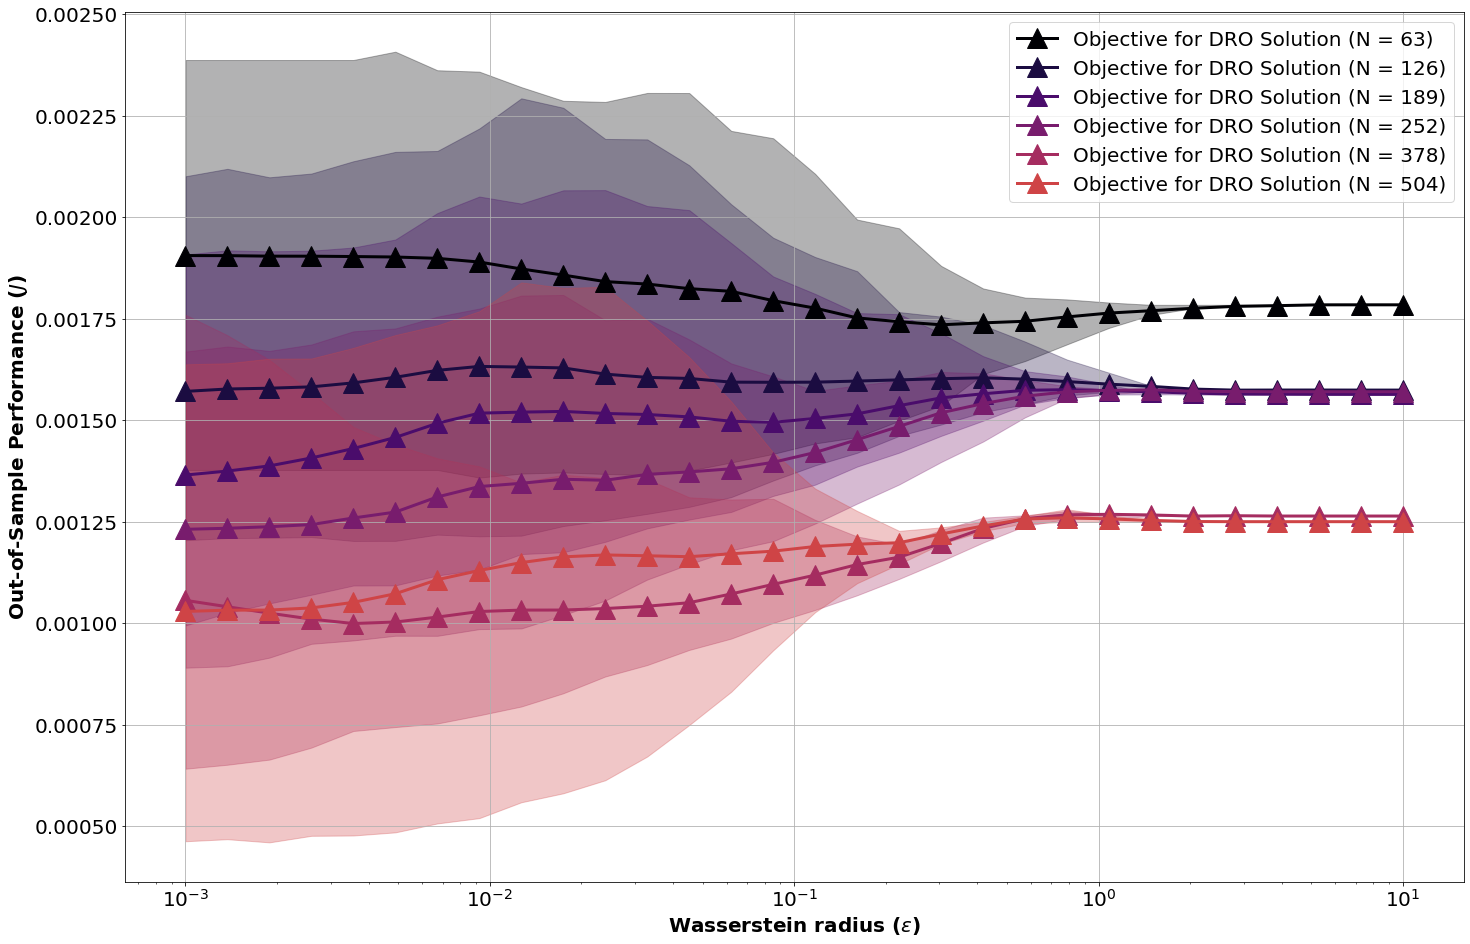

In [251]:
# Choose training size
TS = 5

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

colorChoice = 5
colorChoiceRel = 5

for idxTS, TS in enumerate(trainingSizes):

    # Plot OoS as function of Wasserstein Radius
    meanJ = np.mean(EX1_TM_OoS[idxTS,:,1:,0].T, axis=1)
    P80J = np.quantile(EX1_TM_OoS[idxTS,:,1:,0].T, 0.80, axis=1)
    P20J = np.quantile(EX1_TM_OoS[idxTS,:,1:,0].T, 0.20, axis=1)
    ax.plot(epsCollection, meanJ, 
                marker="^", markersize=20, color=colors[idxTS,:], linewidth=3, label="Objective for DRO Solution (N = {})".format(TS))
    ax.fill_between(epsCollection, P20J, P80J, color=colors[idxTS,:], alpha=0.3)

ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize, fontweight='bold')
ax.set_ylabel(r'Out-of-Sample Performance ($J$)', fontsize=fontSize, fontweight='bold')
ax.set_xscale('log')
ax.grid()

# Set legends
ax.legend(fontsize=fontSize)

# Show plot
plt.show()

Then we aggregate the reliability plot.

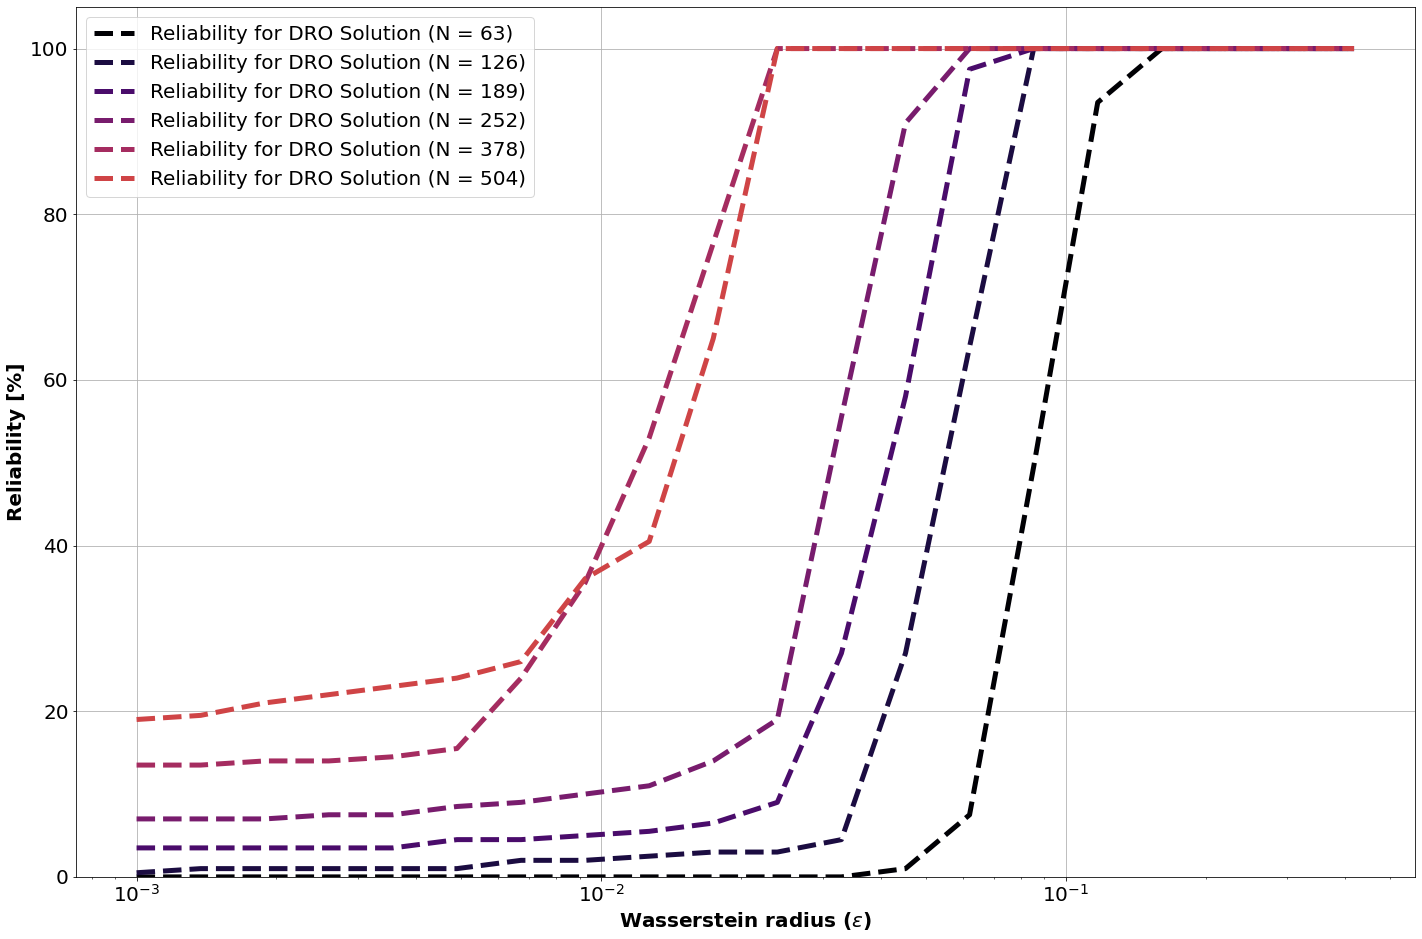

In [250]:
# Specify training sizes
trainingSizes = [63, 126, 189, 252, 378, 504]

# Specify font size
fontSize = 20

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,len(assetNames)))

# Plot the weights
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24, 16))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# Loop over all training sizes
for idxTS, TS in enumerate(trainingSizes):

    # Construct the reliability plot
    relMatrix = EX1_TM_OoS[idxTS,:,1:,0] < EX1_TM_IS[idxTS,:,1:,0]
    totalSim = EX1_TM_OoS[idxTS,:,1:,0].shape[0]
    reliabibility = (np.sum(relMatrix, axis=0)/nSim)*100
    ax.plot(epsCollection[:-10], reliabibility[:-10], color=colors[idxTS,:], linewidth=5, linestyle="--", label="Reliability for DRO Solution (N = {})".format(TS))

# Specify details on plot
ax.set_yticks(np.arange(0, 120, 20))
ax.set_ylim(0, 105)
ax.set_xlabel(r'Wasserstein radius ($\epsilon$)', fontsize=fontSize, fontweight='bold')
ax.set_ylabel(r'Reliability [%]', fontsize=fontSize, fontweight='bold')
ax.set_xscale('log')
ax.legend(fontsize=fontSize)
ax.grid()

# Show plot
plt.show()

## Plots for Experiment 2

In this part, we make plots for the second experiment.

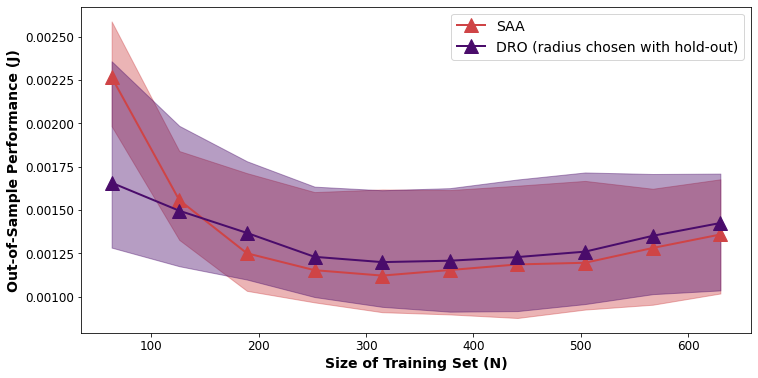

In [262]:
# Get right training sizes
trainingSizes = np.linspace(63,63*10,10, dtype=np.int16) 

# Set font size
fontSizeTickers = 12
fontSize = 14


# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,10))

# Set colors from the scale used for plotting the weights
colorDRO = colors[2]
colorSAA = colors[5]

# Control the width of the confidence intervals
lower = 0.25
upper = 0.75

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
plt.xticks(fontsize=fontSizeTickers)
plt.yticks(fontsize=fontSizeTickers)

# Plot the OoS-performance
J_SAA = EX2_TM_J[0,:,:].T
ax.plot(trainingSizes, np.median(J_SAA, axis=0), color=colorSAA, linewidth=2, marker="^", markersize=14, label="SAA")
ax.fill_between(trainingSizes, np.quantile(J_SAA, lower, axis=0), np.quantile(J_SAA, upper, axis=0), color=colorSAA, alpha=0.4)
J_DRO = EX2_TM_J[1,:,:].T
ax.plot(trainingSizes, np.median(J_DRO, axis=0), color=colorDRO, linewidth=2, marker="^", markersize=14, label="DRO (radius chosen with hold-out)")
ax.fill_between(trainingSizes, np.quantile(J_DRO, lower, axis=0), np.quantile(J_DRO, upper, axis=0), color=colorDRO, alpha=0.4)
ax.set_xlabel(r'Size of Training Set (N)', fontsize=fontSize, fontweight='bold')
ax.set_ylabel(r'Out-of-Sample Performance (J)', fontsize=fontSize, fontweight='bold')
ax.legend(loc="best", facecolor="white", fontsize=fontSize)

# Show figure
plt.show()

Then we plot average Wasserstein radii.

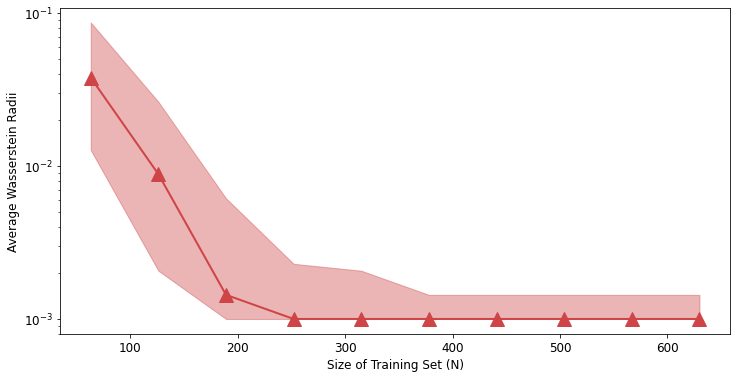

In [235]:
# Get right training sizes
trainingSizes = np.linspace(63,63*10,10, dtype=np.int16) 

# Set font size
fontSize = 12

# Specify colors
myMap = plt.get_cmap('inferno') # Paired, inferno
colors = myMap(np.linspace(0,1,10))

# Set colors from the scale used for plotting the weights
colorDRO_epsOpt = colors[5]

# Control the width of the confidence intervals
lower = 0.25
upper = 0.75

# Prepare plots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
plt.xticks(fontsize=fontSize)
plt.yticks(fontsize=fontSize)

# Plot the OoS-performance
ax.plot(trainingSizes, np.quantile(EX2_TM_E, 0.50, axis=1), color=colorDRO_epsOpt, linewidth=2, marker="^", markersize=14)
ax.fill_between(trainingSizes, np.quantile(EX2_TM_E, lower, axis=1), np.quantile(EX2_TM_E, upper, axis=1), color=colorDRO_epsOpt, alpha=0.4)
ax.set_xlabel(r'Size of Training Set (N)', fontsize=fontSize)
ax.set_ylabel(r'Average Wasserstein Radii', fontsize=fontSize)
ax.set_yscale('log')

# Show figure
plt.show()